<a href="https://colab.research.google.com/github/galihww/PHI-Classification/blob/master/text_classification_Using_SVM%2C_XG_Boost%2C_Random_Search_XG_Boost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Catatan Penting

1. Dataset yang digunakan pada kasus ini sebelumnya, telah melewati tahap preprocessing tahap pertama (lihat pada folder "Preprocessing Dataset"), dengan detail preprocessing tahap pertama sebagai berikut:




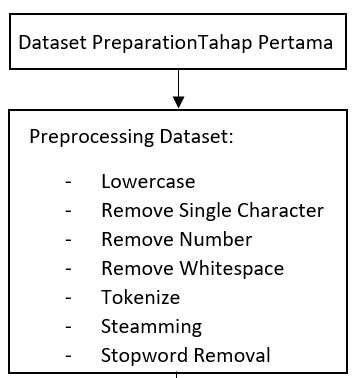

2. Kemudian pada studi kasus ini ditambahkan preprocessing tambahan berupa vectorization dengan menggunakan TF-IDF
3. sehingga, preprocessing keseluruhan pada kasus ini jika digambarkan secara menyeluruh sebagai berikut:


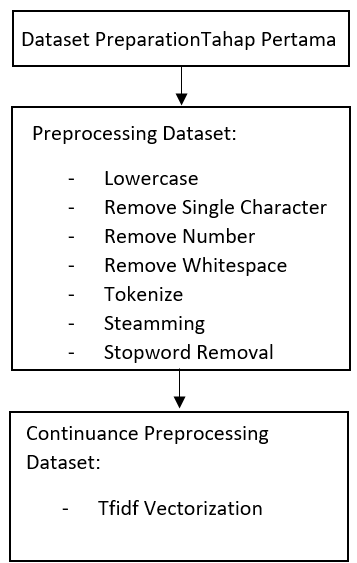

# 1. Defined Dataset Path

1. mengkoneksikan natara google drive dengan google colabolatory

---



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


2. definisikan lokasi dataset

---



In [ ]:
lokasi_dataset = "/content/gdrive/MyDrive/1. Colab Notebooks/modul kecerdasan buatan/0. research text classification/Final Model/Preprocessing Dataset/final_dataset.csv"

# 2. Read Dataset

1. Import Library yang diperlukan untuk preprocessing dataset

---



In [ ]:
import re
import numpy as np
import pandas as pd
import string
from sklearn import preprocessing, model_selection, naive_bayes, svm
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

2. Read Dataset dengan menggunakan library Pandas

---



In [ ]:
dataset = pd.read_csv(lokasi_dataset)
dataset

,Unnamed: 0,Perkara-Final,Label
0,0,timbang gugat surat gugat tanggal oktober da...,0
1,1,timbang gugat surat gugat tanggal februari l...,0
2,2,timbang gugat surat gugat tanggal desember la...,0
3,3,timbang gugat surat gugat tanggal februari d...,0
4,4,timbang gugat surat gugat tanggal april daf...,0
...,...,...,...
445,445,timbang mohon surat mohon berat aju berat ...,1
446,446,timbang mohon berat surat mohon berat tanggal...,1
447,447,timbang mohon berat laku usaha aju berat hada...,1
448,448,timbang mohon berat surat mohon berat tanggal...,1


# 3. Preprocessing Dataset

1. Menghapus Kolom "Unnamed: 0"

---



In [ ]:
dataset.drop('Unnamed: 0', axis=1, inplace=True)

2. Mengecek datset setelah menghapus kolom

---



In [ ]:
dataset

,Perkara-Final,Label
0,timbang gugat surat gugat tanggal oktober da...,0
1,timbang gugat surat gugat tanggal februari l...,0
2,timbang gugat surat gugat tanggal desember la...,0
3,timbang gugat surat gugat tanggal februari d...,0
4,timbang gugat surat gugat tanggal april daf...,0
...,...,...
445,timbang mohon surat mohon berat aju berat ...,1
446,timbang mohon berat surat mohon berat tanggal...,1
447,timbang mohon berat laku usaha aju berat hada...,1
448,timbang mohon berat surat mohon berat tanggal...,1


3. Import Library Text Vectorization (TF-IDF)


---



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

4. Mendefinisikan Label dan Data, dimana Data pada kasus ini adalah variabel "X", sedangkan label didefinisikan dengan variabel "label"

---



In [ ]:
X = dataset['Perkara-Final']
label = dataset['Label']

5. Melakukan vectorization/pembobotan kata-kata dalam dokumen dengan menggunakan (TF-IDF)

TFidfVectorizer digunakan untuk menvectorkan text didalam dokumen

---



In [ ]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vector = tfidf_vectorizer.fit_transform(X)
tfidf_vector.shape

(450, 26132)

# 4. Analyst Data After Preprocessing

## Splitting Dataset

1. Import Library yang akan digunakan untuk melakukan split dataset

---



In [ ]:
from sklearn.model_selection import train_test_split

2. SPlit Dataset dengan rasio 0,2. atau dapat diartikan dataset validasi sebesar 20% sedangkan dataset training sebesar 80%

---



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_vector, label, test_size=0.2, shuffle=True, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(360, 26132)
(90, 26132)
(360,)
(90,)


## Most Common VS Important Words

1. Menganalisa kata-kata umum VS kata-kata penting didalam dokumen dengan menggunakan tfidf berdasarkan tingkat kemunculan kata didalam dokumen.

---



In [ ]:
feature_names = np.array(tfidf_vectorizer.get_feature_names())

# Sort TFIDF by value
max_tf_idfs = X_train.max(0).toarray()[0] # Get largest tfidf values across all documents.
sorted_tf_idxs = max_tf_idfs.argsort() # Sorted indices
sorted_tf_idfs = max_tf_idfs[sorted_tf_idxs] # Sorted TFIDF values

# feature_names doesn't need to be sorted! You just access it with a list of sorted indices!
smallest_tf_idfs = pd.Series(sorted_tf_idfs[:10], index=feature_names[sorted_tf_idxs[:10]])
largest_tf_idfs = pd.Series(sorted_tf_idfs[-10:][::-1], index=feature_names[sorted_tf_idxs[-10:][::-1]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print('Most common words:\n', smallest_tf_idfs)
print('\n')
print('Most important words:\n', largest_tf_idfs)

Most common words:
 zurmini                                           0.0
mehauhbuknagmathidaagkuntegr                      0.0
boh                                               0.0
megasari                                          0.0
meera                                             0.0
boieh                                             0.0
meditaor                                          0.0
mediat                                            0.0
mediasitripartiteantarapenggugatdengantergugat    0.0
mediasitripartit                                  0.0
dtype: float64


Most important words:
 pcs        0.798696
gugat      0.764222
mula       0.729802
bln        0.729571
syar       0.696601
rp         0.677825
dulunya    0.668386
formula    0.664179
magang     0.649952
pdam       0.635675
dtype: float64


## WordCloud

1. Melakukan Import Library WordCloud, untuk memvisualisasi kata-kata didalam sebuah dokumen, sehingga analisa dapat dilakukan dengan mudah.

---



In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image


2. Word CLoud pada Label = 1 (Non-PHI)

---



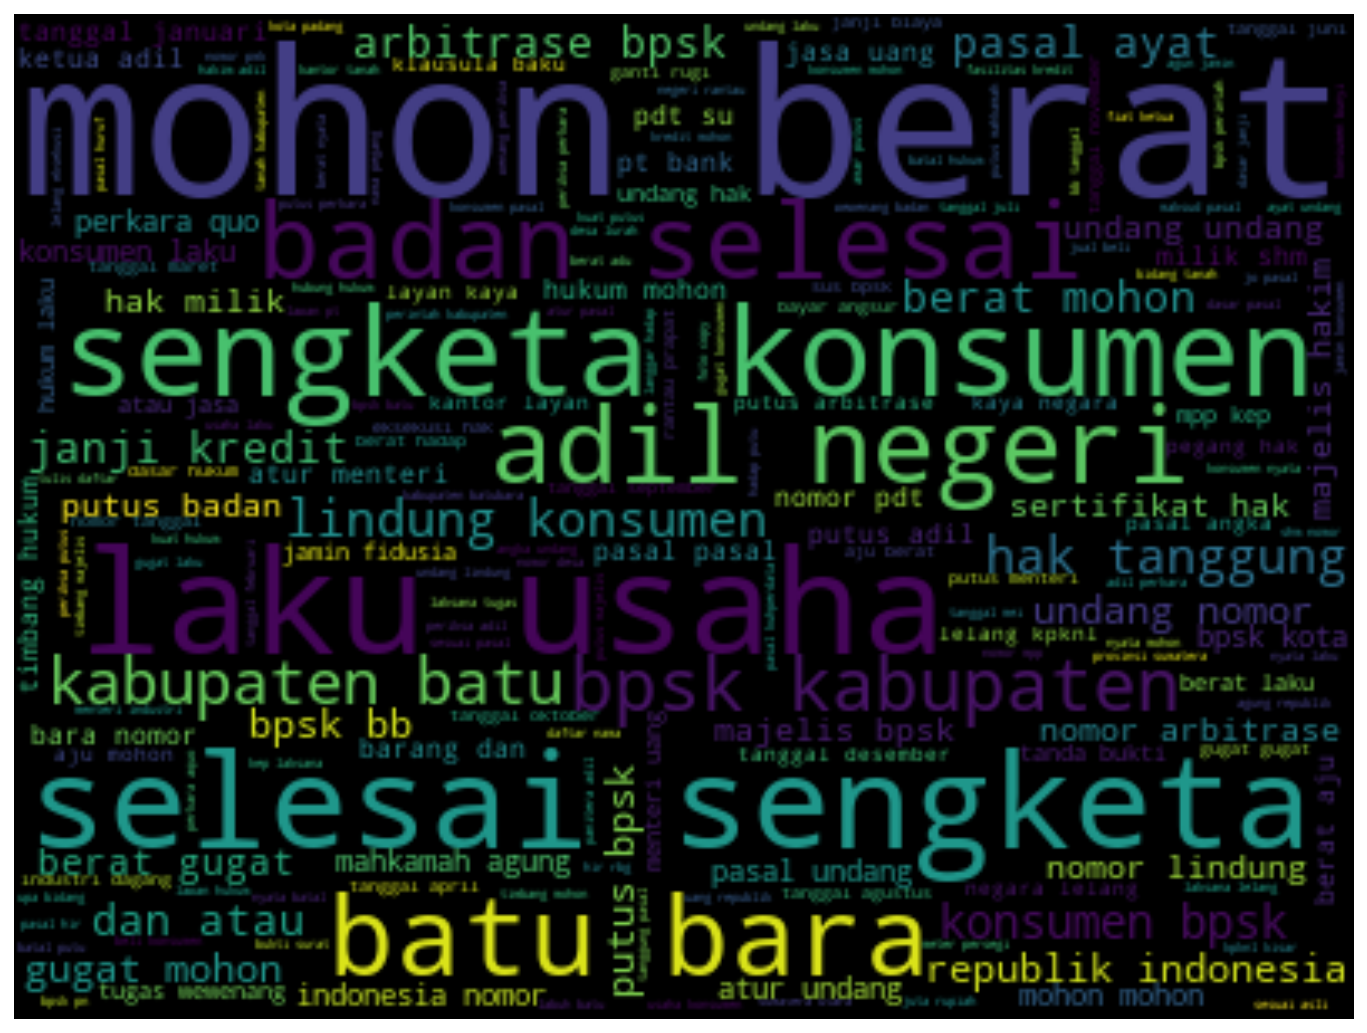

In [ ]:
hs_words = ' '.join([word for word in dataset['Perkara-Final'][dataset['Label']==1]])
wordcloud = WordCloud(width=400, height=300, max_font_size=100).generate(hs_words)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

3. WordCloud pada Label = 0 (PHI)

---



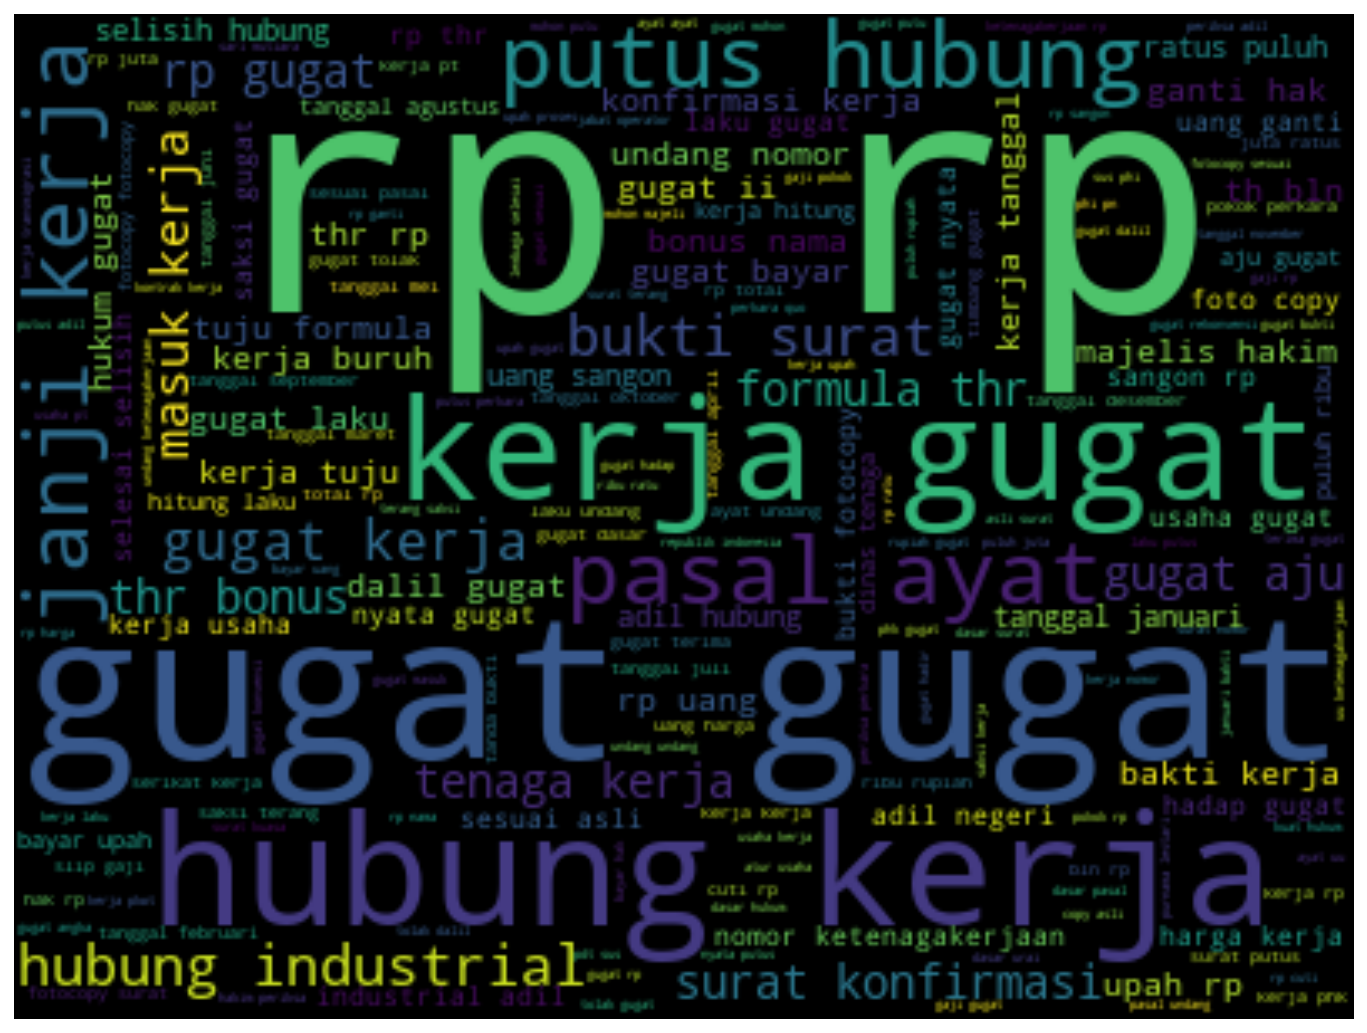

In [ ]:
nonhs_words = ' '.join([word for word in dataset['Perkara-Final'][dataset['Label']==0]])
wordcloud = WordCloud(width=400, height=300, max_font_size=100).generate(nonhs_words)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 5. Modelling

1. Import library yang akan digunakan untuk analisa performa model pada tahap selanjutnya

---



In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics

2. SOurcecode visualisasi teknik analisa performa dengan Confusion Matrix

---



In [ ]:
def print_conf(y_test, result, classes, title='Confusion matrix'):
  conf_matrix = metrics.confusion_matrix(y_test, result)
  plt.figure(figsize=(3,3))
  sns.heatmap(conf_matrix,
              annot=True,
              xticklabels=classes,
              yticklabels=classes,
              cmap="Blues",
              fmt='d')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.title(title)
  plt.show()

## 1. Model SVM

1. Import Library yang diperlukan untuk membangun model svm, dan library yang digunakan untuk memvisualisasikan hasil pelatihan

---



In [ ]:
from sklearn.svm import SVC
import seaborn as sns

2. Proses pelatihan model dengan menggunakan svc() dengan rincian :


*   mendefinisikan jenis kernel yang digunakan. dimana, pada kasus ini menggunakan jenis kernel "linear" yang akan memisahkan data dengan menggunakan garis atau hyperline.
*   Melatih model dengan menggunakan function fit()
*   Untuk mengetahui waktu eksekusi, dilakukan penghitungan start_time dan end_time, untuk mengetahui selesih waktu dan berapa lama proses training berlangsung.  



---



In [ ]:
svc = SVC(kernel='linear')
from datetime import datetime

start_time = datetime.now()

svc.fit(X_train, y_train) #training svc model

end_time = datetime.now()

print('Duration: {}'.format(end_time - start_time))
y_pred_svc = svc.predict(X_test) # predicting test data

Duration: 0:00:00.157691


2. Melihat performa klasifikasi training set dan validation set dengan menggunakan scv.score()

---



In [ ]:
print(svc.score(X_train, y_train))
print(svc.score(X_test, y_test))

1.0
0.9555555555555556


3. analisa performa klasifikasi pada validation dataset dengan menggunakan confusion matrix

---



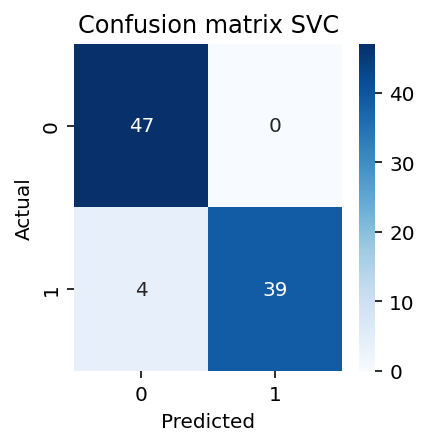

In [ ]:
print_conf(y_test, y_pred_svc, [0, 1], title="Confusion matrix SVC")

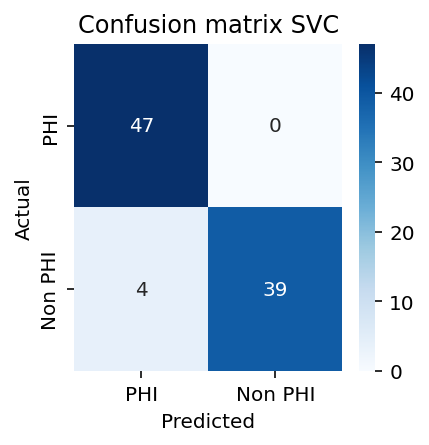

In [ ]:
print_conf(y_test, y_pred_svc, ["PHI", "Non PHI"], title="Confusion matrix SVC")

4. analisa performa klasifikasi pada validation dataset dengan menggunakan classification report

---



In [ ]:
print(metrics.classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        47
           1       1.00      0.91      0.95        43

    accuracy                           0.96        90
   macro avg       0.96      0.95      0.96        90
weighted avg       0.96      0.96      0.96        90



## 2. XGBOOST

1. Import Library yang diperlukan untuk membangun model dengan menggunakan algoritma XGBoost

---



In [ ]:
from xgboost import XGBClassifier

2. Melatih model dengan menggunakan algotirma XGBoost dengan rincian tahap sebagai berikut :


*   Untuk mengetahui lamanya proses training, maka didefinisikan start_time dan juga end_time untuk mengetahui selihnya sebagai lamanya waktu training
*   Melakukan proses training dengan memanggil function fit()



---



In [ ]:
model = XGBClassifier()


from datetime import datetime

start_time = datetime.now()

model.fit(X_train, y_train) #training xgboost model

end_time = datetime.now()

print('Duration: {}'.format(end_time - start_time))

y_pred_xgb = model.predict(X_test) # predicting test data

Duration: 0:00:05.003037


3. Memvisualisasikan Tree dari algoritma XGBoost yang dibuat

---



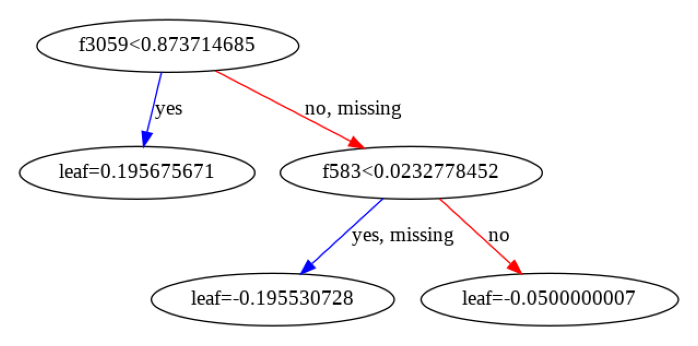

In [ ]:
# plot single tree
from xgboost import plot_tree
plot_tree(model)
plt.show()

4. melakukan analisa performa klasifikasi terhadap dataset train dan validation dengan menggunakan XGBclassifier.score()

---



In [ ]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

1.0
0.9666666666666667


5. Analisa performa klasifikasi pada dataset validation dengan menggunakan confusion matrix

---



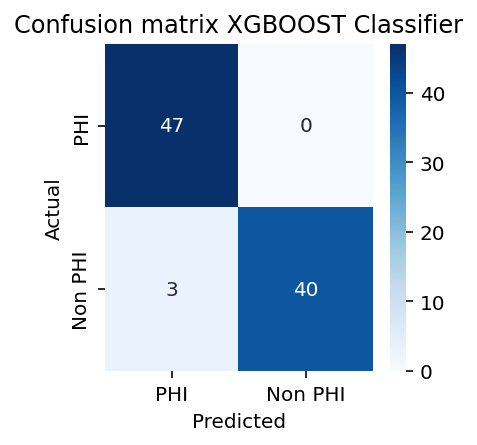

In [ ]:
print_conf(y_test, y_pred_xgb, ["PHI", "Non PHI"], title="Confusion matrix XGBOOST Classifier")

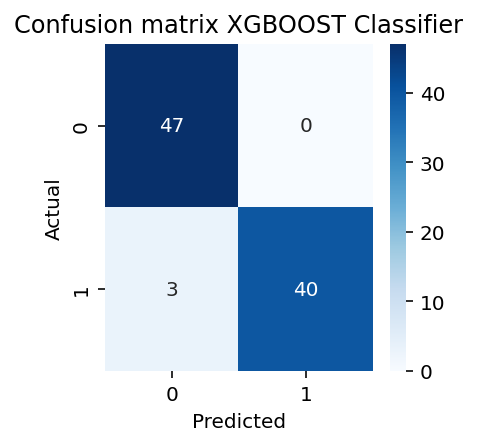

In [ ]:
print_conf(y_test, y_pred_xgb, [0, 1], title="Confusion matrix XGBOOST Classifier")

6. Analisa performa klasifikasi validation dataset dengan menggunakan classification report

---



In [ ]:
print(metrics.classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        47
           1       1.00      0.93      0.96        43

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90



## 3. XGBOOOST - RandomizedSearchCV

XGBoost-RandomizedSearchCV digunakan untuk mencari nilai parameter terbaik secara radom menggunakan SearchCV, sehingga akan menghemat waktu melakukan hyperparameter tuning.





1. Melakukan Import Library RandomizedSearchCV yang akan digunakan, dan mendefinisikan XGBClassifier

---



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
xgb = XGBClassifier()

2. Mendefinisikan nilai random dari 4 parameter, yaitu : learning_rate, max_depth, min_child_weight, dan n_estimators. yang nantinya akan dicari value yang cocok dari masing-masing parameter

---



In [ ]:
params = {'learning_rate': [0.025, 0.05, 0.075, 0.1],
          'max_depth': [6, 7, 8],
          'min_child_weight': [i for i in range(1, 11, 2)],
          'n_estimators': [1000, 250, 500]
}

3. Menjalankan RandomizedSearchCV

In [ ]:
random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=5, scoring='f1', n_jobs=-1, cv=5, verbose=3)

In [ ]:
random_search.fit(tfidf_vector, label)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'learning_rate': [0.025, 0.05, 0.075,
                                                          0.1],
                                        'max_depth': [6, 7, 8],
                                        'min_child_weight': [1, 3, 5, 7, 9],
                                        'n_estimators': [1000, 250, 500]},
                   scoring='f1', verbose=3)

4. Melihat hasil search untuk best_estimator dan best_params


Note: pada kasus ini karena ini merupakan proses running kode yang ke-dua, maka pada proses training nantinya akan terdapat perbedaan dimana tetap menggunakan hasil best_parameter yang dihasilkan pada saat running pertama.

---



In [ ]:
random_search.best_estimator_

XGBClassifier(learning_rate=0.05, max_depth=8, min_child_weight=7,
              n_estimators=500)

In [ ]:
random_search.best_params_

{'learning_rate': 0.05,
 'max_depth': 8,
 'min_child_weight': 7,
 'n_estimators': 500}

5. Menjalankan proses pelatihan model, dengan rincian :


*   Mendefinisikan parameter-parameter terbaik yang telah dihasilkan sebelumnya, yaitu parameter learning_rate, max_depth, min_child_weight, dan n_estimators
*   pendefinisian start_time dan end_time untuk mengetahui selisih waktu keduanya sebagai waktu proses training
*   melakukan pelatihan model dengan memanggil function fit()


---



In [ ]:
xgb_rscv = XGBClassifier(
              learning_rate=0.025, max_depth=6,
              min_child_weight=1, n_estimators=250)

from datetime import datetime

start_time = datetime.now()

xgb_rscv.fit(X_train, y_train) #training svc model

end_time = datetime.now()

print('Duration: {}'.format(end_time - start_time))

y_pred_xgb_rscv = xgb_rscv.predict(X_test) # predicting test data

Duration: 0:00:10.102641


6. mengecek hasil performa klasifikasi data training set dan validation set dengan menggunakan XGB.score()

---



In [ ]:
print(xgb_rscv.score(X_train, y_train))
print(xgb_rscv.score(X_test, y_test))

1.0
0.9777777777777777


7. Memvisualisasi hasil tree yang dihasilkan dari modle yang telah dibangun

---



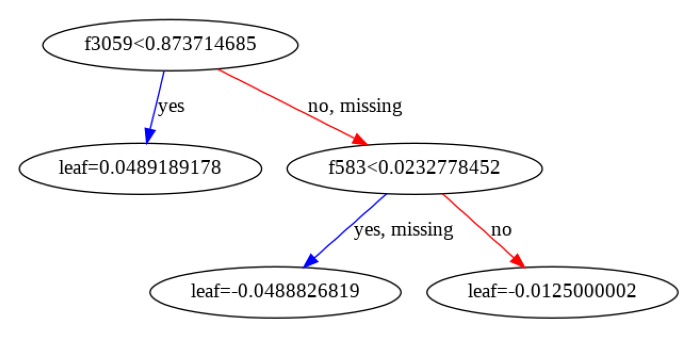

In [ ]:
# plot single tree
from xgboost import plot_tree
plot_tree(xgb_rscv)
plt.show()

8. Mengecek hasil performa klasifikasi pada validation dataset menggunakan confusion matrix

---



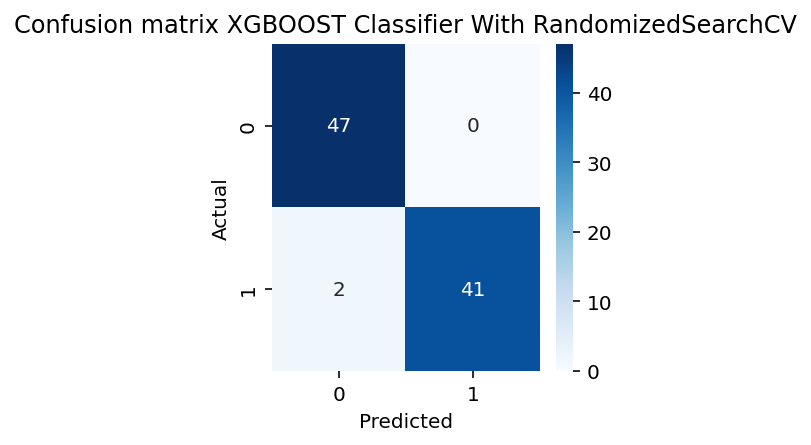

In [ ]:
print_conf(y_test, y_pred_xgb_rscv, [0, 1], title="Confusion matrix XGBOOST Classifier With RandomizedSearchCV")

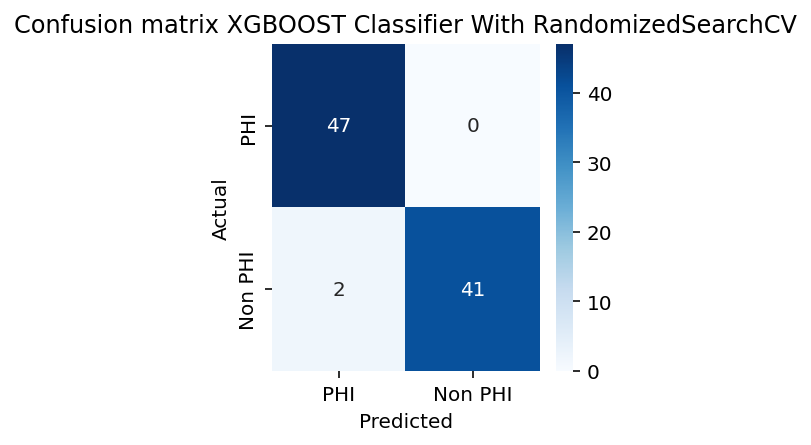

In [ ]:
print_conf(y_test, y_pred_xgb_rscv, ["PHI", "Non PHI"], title="Confusion matrix XGBOOST Classifier With RandomizedSearchCV")

9. Mengecek performa klasifikasi pada dataset validasi dengan menggunakan accuracy_score()

---



In [ ]:
accXGB_RSCV = metrics.accuracy_score(y_test, y_pred_xgb_rscv)

In [ ]:
print(accXGB_RSCV)

0.9777777777777777


10. Analisa performa dataset validasi menggunakan classification report

---



In [ ]:
print(metrics.classification_report(y_test, y_pred_xgb_rscv))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        47
           1       1.00      0.95      0.98        43

    accuracy                           0.98        90
   macro avg       0.98      0.98      0.98        90
weighted avg       0.98      0.98      0.98        90



# Compare Result

1. compare result dari ketiga model yang telah dibangun sebelumnya

---



In [ ]:
# Accuracy Comparison
models = ['SVM', 'XGBOOST', 'RandomSearchCV']
accSVMC = metrics.accuracy_score(y_test,y_pred_svc)
accXGB = metrics.accuracy_score(y_test, y_pred_xgb)
accXGB_RSCV = metrics.accuracy_score(y_test, y_pred_xgb_rscv)
accuracies = [accSVMC, accXGB, accXGB_RSCV]
comp = pd.DataFrame(list(zip(models, accuracies)), columns=['Model', 'Accuracy'])
comp


,Model,Accuracy
0,SVM,0.955556
1,XGBOOST,0.966667
2,RandomSearchCV,0.977778


In [ ]:
import joblib

# Saving model
joblib.dump(svc, '/content/gdrive/MyDrive/1. Colab Notebooks/modul kecerdasan buatan/0. research text classification/Final Model/1. Model XG-Boost, SVM, Random Search XG-Boost/SVC Classifier.joblib')
joblib.dump(tfidf_vectorizer, '/content/gdrive/MyDrive/1. Colab Notebooks/modul kecerdasan buatan/0. research text classification/Final Model/1. Model XG-Boost, SVM, Random Search XG-Boost/TF-IDF Vectorizer.joblib')

['/content/gdrive/MyDrive/1. Colab Notebooks/modul kecerdasan buatan/0. research text classification/Final Model/1. Model XG-Boost, SVM, Random Search XG-Boost/TF-IDF Vectorizer.joblib']